# Q-learning Method

## Prepare the packages

In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import sys
if "../" not in sys.path:
    sys.path.append("../") 

In [33]:
from collections import defaultdict
import gym
from el_agent import ELAgent
from frozen_lake_util import show_q_value

## Define Q-learning Agent

In [34]:
class QLearningAgent(ELAgent):

    def __init__(self, epsilon=0.1):
        super().__init__(epsilon)

    def learn(self, env, episode_count=1000, gamma=0.9,
              learning_rate=0.1, render=False, report_interval=50):
        self.init_log()
        self.Q = defaultdict(lambda: [0] * len(actions))
        actions = list(range(env.action_space.n))
        for e in range(episode_count):
            s = env.reset()
            done = False
            while not done:
                if render:
                    env.render()
                a = self.policy(s, actions)
                n_state, reward, done, info = env.step(a)

                gain = reward + gamma * max(self.Q[n_state])
                estimated = self.Q[s][a]
                self.Q[s][a] += learning_rate * (gain - estimated)
                s = n_state

            else:
                self.log(reward)

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

## Train Agent

In [35]:
def train():
    agent = QLearningAgent()
    env = gym.make("FrozenLakeEasy-v0")
    agent.learn(env, episode_count=500)
    print(agent.Q)
    show_q_value(agent.Q)
    agent.show_reward_log()

At Episode 50 average reward is 0.0 (+/-0.0).
At Episode 100 average reward is 0.02 (+/-0.14).
At Episode 150 average reward is 0.0 (+/-0.0).
At Episode 200 average reward is 0.46 (+/-0.498).
At Episode 250 average reward is 1.0 (+/-0.0).
At Episode 300 average reward is 0.82 (+/-0.384).
At Episode 350 average reward is 0.86 (+/-0.347).
At Episode 400 average reward is 0.9 (+/-0.3).
At Episode 450 average reward is 0.84 (+/-0.367).
defaultdict(<function QLearningAgent.learn.<locals>.<lambda> at 0x7fc6a5814b00>, {1: [0.37753560432188327, 0.0, 0.6560999996094049, 0.22609732783069286], 0: [0.26601272465791176, 0.06568042303689528, 0.5904899985491963, 0.1854055586365042], 5: [0, 0, 0, 0], 4: [0.0, 0.0, 0.0, 0.26690230012123756], 8: [0.0, 0.0, 0.0, 0.0], 12: [0, 0, 0, 0], 2: [0.25534086824880786, 0.7289999999216625, 0.11841650215257549, 0.3074215494845959], 6: [0.0, 0.8099999999845777, 0.0, 0.47137213381123094], 10: [0.04186411346967081, 0.8999999999985453, 0.0, 0.36012582151484634], 11: [0

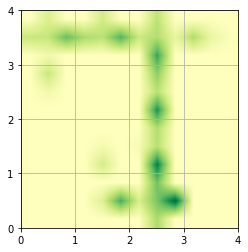

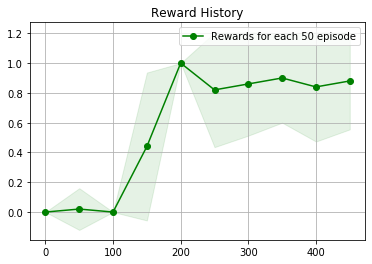

In [36]:
agent = train()

In [39]:
agent = QLearningAgent()
env = gym.make("FrozenLakeEasy-v0")
agent.learn(env, episode_count=500)
print(agent.Q)

At Episode 50 average reward is 0.02 (+/-0.14).
At Episode 100 average reward is 0.06 (+/-0.237).
At Episode 150 average reward is 0.92 (+/-0.271).
At Episode 200 average reward is 0.84 (+/-0.367).
At Episode 250 average reward is 0.86 (+/-0.347).
At Episode 300 average reward is 0.92 (+/-0.271).
At Episode 350 average reward is 0.94 (+/-0.237).
At Episode 400 average reward is 0.88 (+/-0.325).
At Episode 450 average reward is 0.86 (+/-0.347).
defaultdict(<function QLearningAgent.learn.<locals>.<lambda> at 0x7fc6a5bb05f0>, {4: [0.0, 0.0, 0.0, 0.38495904479029447], 0: [0.4189133017333648, 0.18345300422941385, 0.5904899999968558, 0.2996460924969021], 8: [0.0, 0.0, 0.0, 0.0], 9: [0.0, 0.0, 0.5801383601358638, 0.0], 13: [0.0, 0.0, 0.4686410795228288, 0.06372638804621031], 5: [0, 0, 0, 0], 1: [0.27396030770537216, 0.0, 0.656099999999401, 0.3845871085257025], 12: [0, 0, 0, 0], 10: [0.215982215736801, 0.8999999999999986, 0.0, 0.49984669883230876], 2: [0.4237156779166504, 0.7289999999999235, 0

In [42]:
agent.Q[20]

[0, 0, 0, 0]

In [46]:
agent.Q

defaultdict(<function __main__.QLearningAgent.learn.<locals>.<lambda>()>,
            {4: [0.0, 0.0, 0.0, 0.38495904479029447],
             0: [0.4189133017333648,
              0.18345300422941385,
              0.5904899999968558,
              0.2996460924969021],
             8: [0.0, 0.0, 0.0, 0.0],
             9: [0.0, 0.0, 0.5801383601358638, 0.0],
             13: [0.0, 0.0, 0.4686410795228288, 0.06372638804621031],
             5: [0, 0, 0, 0],
             1: [0.27396030770537216,
              0.0,
              0.656099999999401,
              0.3845871085257025],
             12: [0, 0, 0, 0],
             10: [0.215982215736801,
              0.8999999999999986,
              0.0,
              0.49984669883230876],
             2: [0.4237156779166504,
              0.7289999999999235,
              0.19265328945377203,
              0.42393287011759984],
             3: [0.4615501044755255, 0.0, 0.032361771533128754, 0.0],
             7: [0, 0, 0, 0],
             6: 